# Exploratory Data Analysis & Data Storytelling for IDS KDDCUP99 Dataset


**Problem:**

Use cleaned KDD99Cup IDS data from data wrangling stage and apply exploratory data analysis to help us build a real-time network intrusion detection system.

**Approach:**

1. Ask questions. With hypothesis, test if the hypothesis is true.
2. Use panads, matplotlib & seaborn to plot dist plot, count plot, scatter plot, geodata, etc. to answer the questions.
3. Repeat the above procedure until all the question are asked and answered.

**Top Questions:**

We can think of the following questions and apply them to our KDD99Cup IDS dataset:

2. What might be the most important features that help in differentiating a network intrusion from a normal activity to help us build a real-time network intrusion detection system?

3. What percentage of observations in training set are redundant & not useful?

4. What are the different categories of attack type?

5. What are the different service types & traffic features of these services used for attack?

6. Are there strong correlations between traffic features of different services and attack type?

7. Could we use hypothesis testing by performing statistical methods on correlated service and traffic features ? (optional)
   Null Hypothesis: The incoming traffic is not an attack
   Alternate Hypothesis: The incoming traffic is an attack
   
8. What should be our approach for hypothesis analysis :one-sample test/two-sample test/bootstrap replicates?(optional)

9. Could we use univariate , bivariate or multivariate statistical method for analysis?(optional)

10. Could we use better tools to present our EDA/findings?

**Conclusion:**

1. There are 4 categories of attack types used for network intrusion - **DDos, U2R, R2L, Probe**.

2. Before data prepocessing we see the following % distribution:

    **normal    60.329977%**

    **dos       37.484373%**

    **probe      1.463740%**

    **r2l        0.686192%**

    **u2r        0.035718%**

3. After data preprocessing we see the following % distribution, **DOS attacks are majorly used** with TCP protocol:

    **dos       79.239142%**

    **normal    19.691066%**

    **probe      0.831341%**

    **r2l        0.227926%**

    **u2r        0.010526%**

4. We see strong correlation between **'serror_rate'** basic Traffic features computed using a two-second time window.
The following types of non-categorial parameters, could be useful to build predictive IDS model for attack :

    **serror_rate 	    %  of connections that have SYN errors** 	

    **same_srv_rate 	% of connections to the same service** 	

    **diff_srv_rate 	% of connections to different services** 	

    **srv_count 	     number of connections to the same service as the current connection in the past two seconds** 	

    **srv_serror_rate 	% of connections that have SYN errors** 	

    **srv_diff_host_rate 	% of connections to different hosts** 	 

**We could propose to use SYN error rate in the incoming traffic to predict attack type classified as DOS, U2R, R2L, Probe or Normal**

In [ ]:
## Import required libraries
import os
import numpy                   as np
import pandas                  as pd
import matplotlib              as pl
import seaborn                 as sns

## Reading training .csv files
df = pd.read_csv("data/kddcup-training.csv")
df.head()

In [12]:
df.shape

(494021, 42)

In [10]:
## Reading test .csv files
df_test = pd.read_csv("data/corrected.csv")
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [13]:
df_test.shape

(311029, 42)

In [14]:
# Identify 4 catogries of attack type
df['label'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: label, dtype: int64

In [24]:
dos_types = ['back.', 'land.', 'neptune.', 'pod.', 'smurf.', 'teardrop.']
dos_df = df[df.label.isin(dos_types)] 
dos_df.shape
dos_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
7601,0,tcp,telnet,S0,0,0,0,0,0,0,...,6,1.00,0.00,0.20,0.33,1.0,0.83,0.0,0.0,neptune.
7602,0,tcp,telnet,S0,0,0,0,0,0,0,...,16,1.00,0.00,0.07,0.12,1.0,0.94,0.0,0.0,neptune.
7793,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,3,0.02,0.02,0.02,0.00,0.0,0.00,0.0,0.0,smurf.
7794,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,13,0.08,0.02,0.08,0.00,0.0,0.00,0.0,0.0,smurf.
7795,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,23,0.14,0.02,0.14,0.00,0.0,0.00,0.0,0.0,smurf.


In [19]:
probe_types = ['ipsweep.','nmap.','portsweep.','satan.']
probe_df = df[df.label.isin(probe_types)] 
probe_df.shape
probe_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
22814,1,tcp,private,RSTR,0,0,0,0,0,0,...,2,0.01,0.04,0.04,0.0,0.01,0.0,0.32,1.0,portsweep.
22815,1,tcp,private,RSTR,0,0,0,0,0,0,...,2,0.01,0.06,0.10,0.0,0.01,0.0,0.36,1.0,portsweep.
22816,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.01,0.09,0.14,0.0,0.01,0.0,0.39,1.0,portsweep.
22817,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.11,0.18,0.0,0.01,0.0,0.42,1.0,portsweep.
22818,1,tcp,private,RSTR,0,0,0,0,0,0,...,2,0.01,0.12,0.22,0.0,0.01,0.0,0.44,1.0,portsweep.


In [21]:
r2l_types = ['ftp_write.', 'guess_passwd.', 'imap.', 'multihop.', 'phf.','spy.', 'warezclient.', 'warezmaster.']
r2l_df = df[df.label.isin(r2l_types)] 
r2l_df.shape
r2l_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
15699,23,tcp,telnet,SF,104,276,0,0,0,0,...,2,1.0,0.0,1.00,1.0,0.00,0.00,0.00,0.00,guess_passwd.
22750,60,tcp,telnet,S3,125,179,0,0,0,1,...,1,1.0,0.0,1.00,0.0,1.00,1.00,0.00,0.00,guess_passwd.
22751,0,tcp,telnet,RSTO,125,179,0,0,0,1,...,2,1.0,0.0,0.50,0.0,0.50,0.50,0.50,0.50,guess_passwd.
22752,0,tcp,telnet,RSTO,125,179,0,0,0,1,...,3,1.0,0.0,0.33,0.0,0.33,0.33,0.67,0.67,guess_passwd.
22753,0,tcp,telnet,RSTO,125,179,0,0,0,1,...,4,1.0,0.0,0.25,0.0,0.25,0.25,0.75,0.75,guess_passwd.


In [22]:
u2r_types = [ 'buffer_overflow.', 'loadmodule.', 'perl.', 'rootkit.']
u2r_df = df[df.label.isin(u2r_types)] 
u2r_df.shape
u2r_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
744,184,tcp,telnet,SF,1511,2957,0,0,0,3,...,3,1.00,0.00,1.00,0.67,0.0,0.0,0.0,0.0,buffer_overflow.
745,305,tcp,telnet,SF,1735,2766,0,0,0,3,...,4,1.00,0.00,0.50,0.50,0.0,0.0,0.0,0.0,buffer_overflow.
4049,79,tcp,telnet,SF,281,1301,0,0,0,2,...,10,1.00,0.00,1.00,0.30,0.0,0.0,0.0,0.1,loadmodule.
4113,25,tcp,telnet,SF,269,2333,0,0,0,0,...,2,0.03,0.06,0.01,0.00,0.0,0.0,0.0,0.0,perl.
41712,150,tcp,telnet,SF,1587,6707,0,0,0,1,...,1,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,buffer_overflow.


In [23]:
normal_types = [ 'normal.']
normal_df = df[df.label.isin(normal_types)] 
normal_df.shape
normal_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [32]:
df.loc[df.label.isin(dos_types) , 'attack_type'] = 'dos'  
df.loc[df.label.isin(probe_types) , 'attack_type'] = 'probe'
df.loc[df.label.isin(r2l_types) , 'attack_type'] = 'r2l'
df.loc[df.label.isin(u2r_types) , 'attack_type'] = 'u2r'
df.loc[df.label.isin(normal_types) , 'attack_type'] = 'normal'

In [37]:
df_pre = df['attack_type'].value_counts(normalize=True) * 100
type(df_pre)
df_pre

dos       79.239142
normal    19.691066
probe      0.831341
r2l        0.227926
u2r        0.010526
Name: attack_type, dtype: float64

In [38]:
df.drop_duplicates(subset=None, keep='first', inplace=True)

In [40]:
df_post = df['attack_type'].value_counts(normalize=True) * 100
type(df_post)
df_post

normal    60.329977
dos       37.484373
probe      1.463740
r2l        0.686192
u2r        0.035718
Name: attack_type, dtype: float64

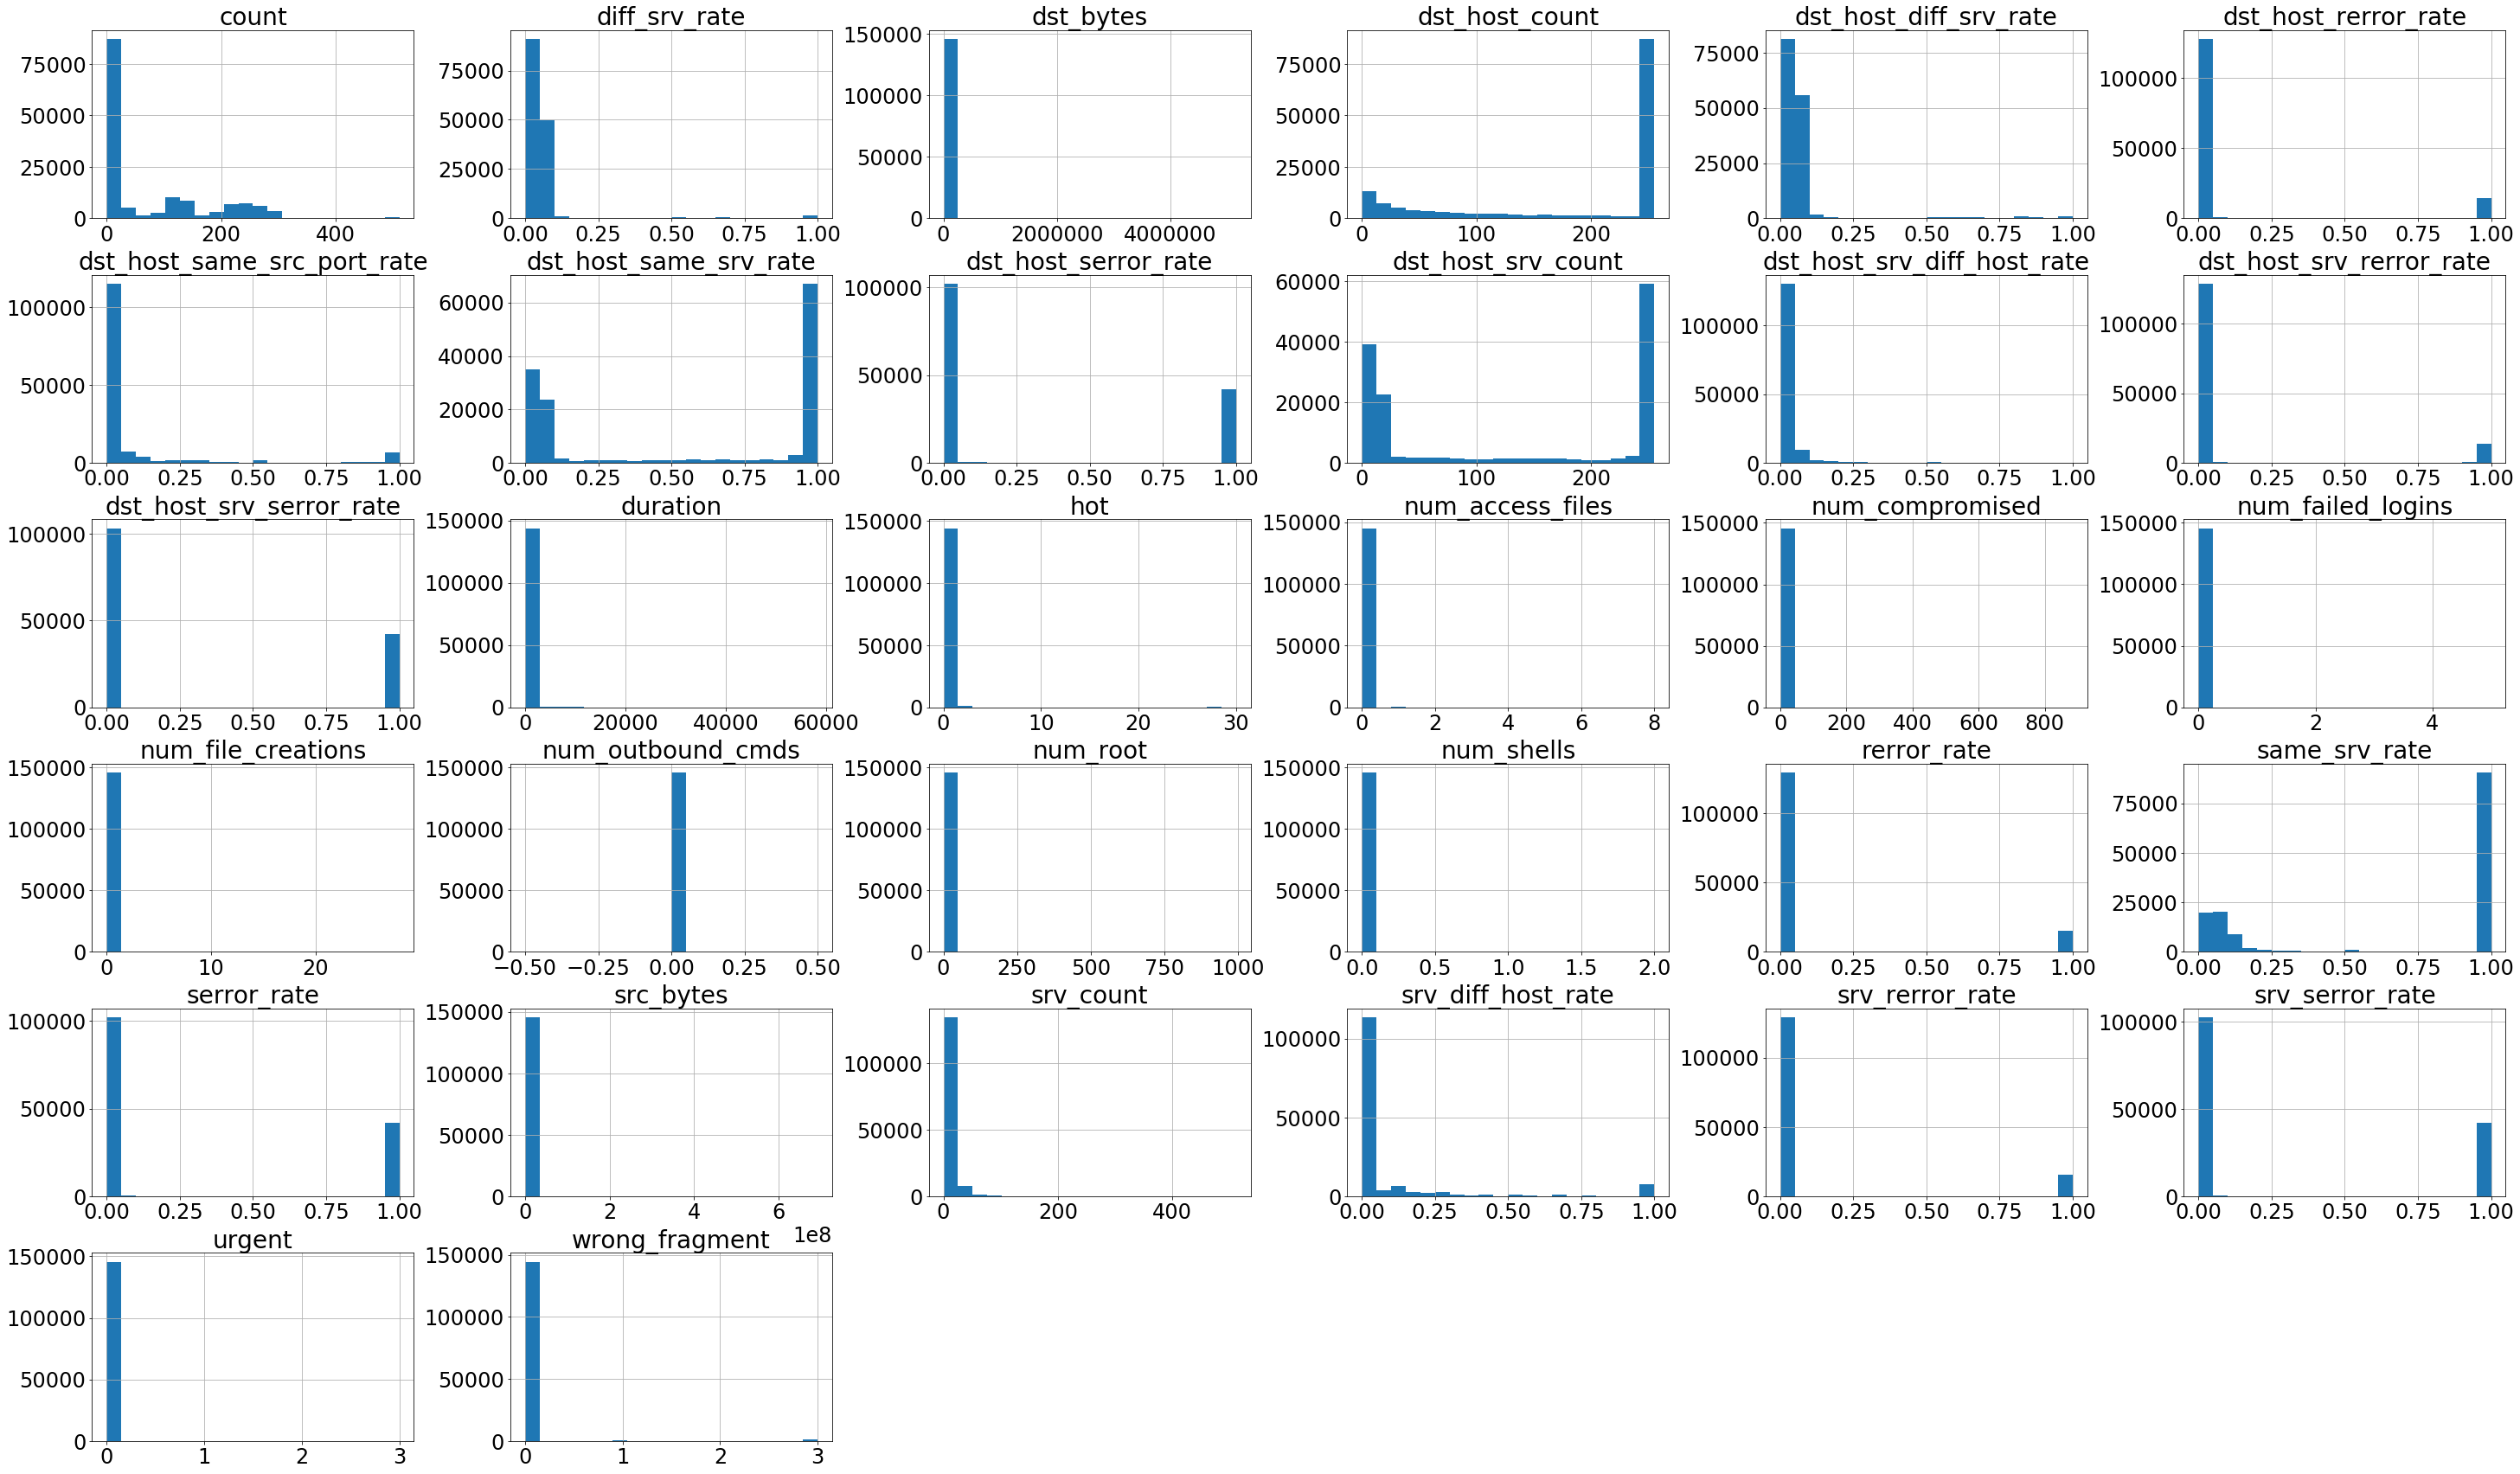

In [41]:
## Identifying columns as categorical or not
categorical_columns = ["protocol_type","service","flag","land","logged_in","root_shell","su_attempted","is_host_login","is_guest_login","label","attack_type"]
df_categorical = df[categorical_columns]
df_non_categorical = df.drop(categorical_columns, axis=1)
import matplotlib
import matplotlib.pyplot as plt

params = {'axes.titlesize':'28',
          'xtick.labelsize':'24',
          'ytick.labelsize':'24'}
matplotlib.rcParams.update(params)
df_non_categorical.hist(figsize=(50, 30), bins=20)
plt.show()

In [104]:
## List non categorical data
df_non_categorical.describe()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,145586.000000,1.455860e+05,1.455860e+05,145586.000000,145586.000000,145586.000000,145586.000000,145586.000000,145586.000000,145586.000000,...,145586.000000,145586.000000,145586.000000,145586.000000,145586.000000,145586.000000,145586.000000,145586.000000,145586.000000,145586.000000
mean,132.025181,7.995700e+03,2.859780e+03,0.020201,0.000048,0.100174,0.000515,0.026177,0.038520,0.003675,...,181.468177,129.934678,0.553222,0.061389,0.092825,0.019048,0.291597,0.290978,0.110463,0.107675
std,1224.157053,1.820383e+06,6.080979e+04,0.239368,0.010150,1.426798,0.028585,3.311373,3.707494,0.177581,...,99.098197,114.714829,0.456236,0.147021,0.241123,0.060410,0.452492,0.453447,0.306097,0.304220
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,78.000000,12.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.470000e+02,1.050000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,117.000000,0.770000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.880000e+02,1.164750e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.030000,0.020000,1.000000,1.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,3.000000,3.000000,30.000000,5.000000,884.000000,993.000000,28.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [103]:
# Check for correlated features
df_num_corr = df_non_categorical.corr()['srv_count'][:-1] # -1 because the latest row 
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with srv_count:\n{}".format(len(golden_features_list), golden_features_list))


There is 1 strongly correlated values with srv_count:
srv_count    1.0
Name: srv_count, dtype: float64


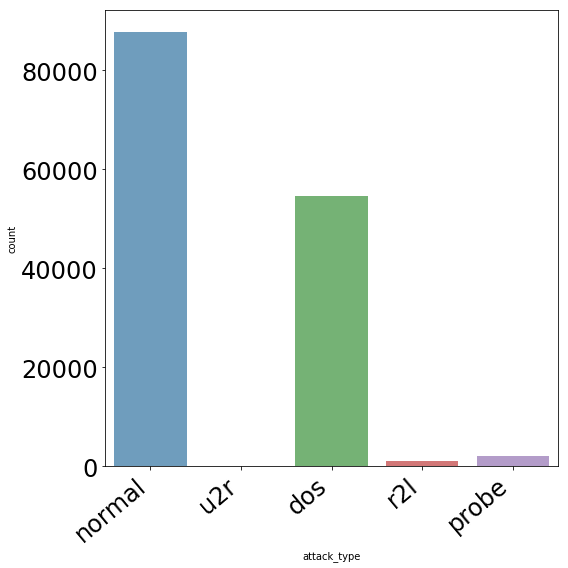

In [57]:
min_categorical_columns = ["attack_type"]
min_df_categorical = df[min_categorical_columns]

fig, axes = plt.subplots(len(min_df_categorical.columns), 1, figsize=(8, 8))

for i, ax in enumerate(fig.axes):
    if i < len(min_df_categorical.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=40,  ha="right")
        sns.countplot(x=min_df_categorical.columns[i], alpha=0.7, data=min_df_categorical, ax=ax)

fig.tight_layout()

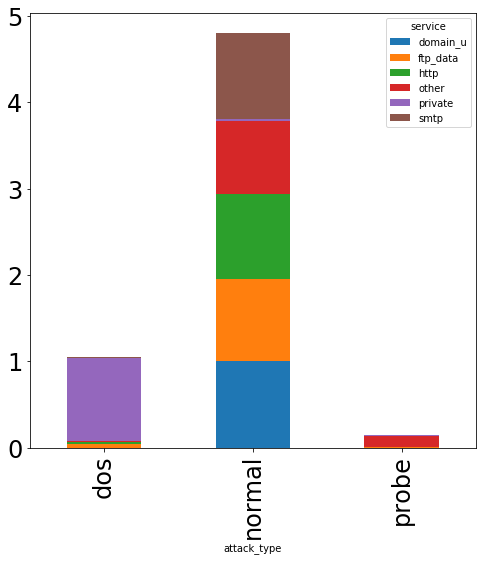

In [86]:
## Create a subset of main dataset (f_data) that contains only services a nd labels that represents at
## least 1% of the total cases
f_services = pd.crosstab(index=df["service"],columns="count")
f_services = f_services/len(df)
f_services = f_services[f_services["count"] > 0.01]
f_attacks = pd.crosstab(index=df["attack_type"],columns="count")
f_attacks = f_attacks/len(df)
f_attacks = f_attacks[f_attacks["count"] > 0.01]
f_data = df[df['service'].isin(list(f_services.index))]
f_data = f_data[f_data['attack_type'].isin(list(f_attacks.index))]
## Create the plot
attack_data = pd.crosstab(index = f_data["attack_type"], columns=f_data["service"])
frequency_table_attack = (attack_data/attack_data.sum())
frequency_table_attack.plot(kind="bar",
                            figsize=(8,8),
                            stacked=True);

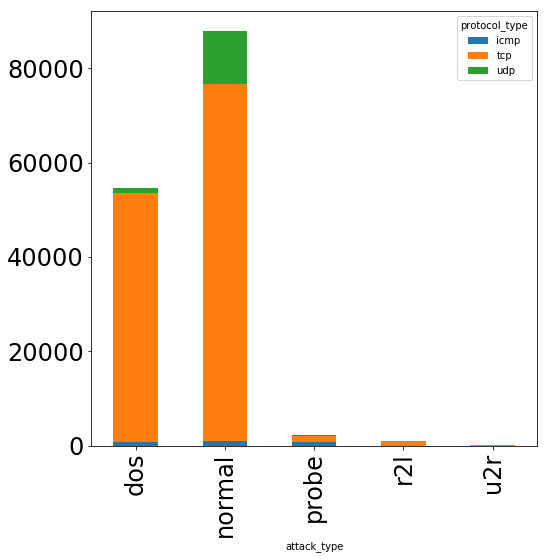

In [85]:
## Create a subset of main dataset (f_data) that contains only protocols
## and labels that represents at
## least 1% of the total cases
f_protocol = pd.crosstab(index=df["protocol_type"],columns="count")
f_protocol = f_protocol/len(df)
#f_protocol = f_protocol[f_protocol["count"] > 0.01]
f_data = df[df['protocol_type'].isin(list(f_protocol.index))]
f_data = f_data[f_data['attack_type'].isin(list(f_attacks.index))]
## Create a Two-Way Table
relationship_protocoal_attack = pd.crosstab(index=f_data["attack_type"],
columns=f_data["protocol_type"])
## Plot the Two-Way Table
relationship_protocoal_attack.plot(kind="bar",
                                   figsize=(8,8),
                                   stacked=True);

In [91]:


basic_tcp_cols = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login','label', 'attack_type']

df.drop(basic_tcp_cols, axis=1).corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,1.0,0.23,0.69,0.69,0.2,0.19,-0.84,0.28,-0.27,0.5,-0.64,-0.7,0.16,-0.21,-0.22,0.69,0.69,0.2,0.2
srv_count,0.23,1.0,-0.045,-0.047,-0.067,-0.067,0.069,-0.068,-0.07,0.1,0.12,0.097,-0.084,0.095,-0.053,-0.046,-0.046,-0.059,-0.064
serror_rate,0.69,-0.045,1.0,1.0,-0.22,-0.22,-0.83,0.15,-0.24,0.47,-0.66,-0.71,0.04,-0.24,-0.2,1.0,1.0,-0.23,-0.22
srv_serror_rate,0.69,-0.047,1.0,1.0,-0.22,-0.23,-0.82,0.16,-0.24,0.47,-0.66,-0.71,0.041,-0.24,-0.2,1.0,1.0,-0.22,-0.23
rerror_rate,0.2,-0.067,-0.22,-0.22,1.0,0.99,-0.22,0.13,-0.03,0.0071,-0.19,-0.17,0.095,0.0057,0.16,-0.22,-0.22,0.98,0.97
srv_rerror_rate,0.19,-0.067,-0.22,-0.23,0.99,1.0,-0.22,0.12,-0.024,0.0088,-0.18,-0.17,0.084,0.004,0.16,-0.22,-0.22,0.97,0.98
same_srv_rate,-0.84,0.069,-0.83,-0.82,-0.22,-0.22,1.0,-0.35,0.29,-0.56,0.8,0.86,-0.15,0.25,0.24,-0.82,-0.83,-0.22,-0.22
diff_srv_rate,0.28,-0.068,0.15,0.16,0.13,0.12,-0.35,1.0,-0.089,0.2,-0.32,-0.34,0.44,0.051,-0.086,0.15,0.16,0.12,0.12
srv_diff_host_rate,-0.27,-0.07,-0.24,-0.24,-0.03,-0.024,0.29,-0.089,1.0,-0.27,0.2,0.24,-0.084,0.061,0.18,-0.24,-0.24,-0.032,-0.036
dst_host_count,0.5,0.1,0.47,0.47,0.0071,0.0088,-0.56,0.2,-0.27,1.0,-0.44,-0.56,0.19,-0.26,-0.46,0.47,0.47,0.005,0.0076
